# Recurrent Neural Network

Mekanisme RNN menggunakan nilai hidden layer dari proses sebelumnya untuk menjadi input tambahan pada proses berikutnya. 

### Tugas
Tempelkan (concatenate) hidden layer yang didapatkan dari proses sebelumnya dengan input data berikutnya untuk menjadi input data yang baru untuk proses setelahnya. 

In [1]:
import torch

class RNN(torch.nn.Module):

    # you can also accept arguments in your model constructor
    def __init__(self, data_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        input_size = data_size + hidden_size

        self.i2h = torch.nn.Linear(input_size, hidden_size)
        self.h2o = torch.nn.Linear(hidden_size, output_size)

    def forward(self, data, last_hidden):
        input_data = torch.cat((data, last_hidden), 1)
        hidden = self.i2h(input_data)
        output = self.h2o(hidden)
        return hidden, output


rnn = RNN(50, 20, 10)

### Tugas

Hitung total akumulasi loss function untuk setiap proses dan lakukan backwardpropagation sekali saja

In [2]:
learning_rate = 0.005
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

batch_size = 16
timestep = 5

# Create some fake data
batch = torch.randn(batch_size, 50)
hidden = torch.zeros(batch_size, 20)
target = torch.zeros(batch_size, 10)

print(rnn.i2h.weight)

loss = 0
for t in range(timestep):
    # yes! you can reuse the same network several times,
    # sum up the losses, and call backward!
    hidden, output = rnn(batch, hidden)
    loss += loss_fn(output, target)
loss.backward()
optimizer.step()
print(loss)
print(rnn.i2h.weight)

    
    

Parameter containing:
tensor([[ 0.0057, -0.0611, -0.0260,  ..., -0.0871,  0.0433,  0.0333],
        [ 0.0117, -0.0537, -0.0993,  ...,  0.1078, -0.0304, -0.0031],
        [-0.1030, -0.0600, -0.0421,  ..., -0.0158, -0.0437,  0.1043],
        ...,
        [-0.0590,  0.1062,  0.0112,  ...,  0.0732,  0.0840, -0.1156],
        [-0.0768, -0.0707,  0.0612,  ...,  0.1133,  0.0185,  0.0307],
        [-0.0708,  0.0951,  0.0373,  ..., -0.1107,  0.0072, -0.1051]],
       requires_grad=True)
tensor(0.4076, grad_fn=<AddBackward0>)
Parameter containing:
tensor([[ 0.0107, -0.0661, -0.0210,  ..., -0.0921,  0.0483,  0.0283],
        [ 0.0067, -0.0487, -0.0943,  ...,  0.1128, -0.0254,  0.0019],
        [-0.1080, -0.0550, -0.0371,  ..., -0.0108, -0.0487,  0.1093],
        ...,
        [-0.0640,  0.1012,  0.0162,  ...,  0.0682,  0.0790, -0.1106],
        [-0.0718, -0.0657,  0.0562,  ...,  0.1183,  0.0135,  0.0257],
        [-0.0658,  0.1001,  0.0323,  ..., -0.1157,  0.0122, -0.1101]],
       requires_grad=T

Data
==================

   Unduh data ini https://download.pytorch.org/tutorial/data.zip
   dan taruh pada folder yang sama dengan notebook ini

data ini berisi dictionary dari daftar nama dari tiap bahasa



In [3]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Portuguese.txt', 'data/names/Dutch.txt', 'data/names/Russian.txt', 'data/names/Chinese.txt', 'data/names/Spanish.txt', 'data/names/Japanese.txt', 'data/names/Korean.txt', 'data/names/Czech.txt', 'data/names/Polish.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/Italian.txt', 'data/names/Arabic.txt', 'data/names/German.txt', 'data/names/Scottish.txt', 'data/names/Greek.txt', 'data/names/English.txt', 'data/names/Vietnamese.txt']
Slusarski


Sekarang kita mempunyai variabel ``category_lines``, dictionary yang memetakan setiap kategori bahasa ke sebuah daftar nama-nama. Kita juga melacak ``all_categories`` (daftar bahasa) dan ``n_categories`` untuk referensi.




In [4]:
print(category_lines['English'][:25])
print(category_lines['Spanish'][:25])
print(category_lines['Italian'][:25])
print(category_lines['German'][:25])
print(category_lines['French'][:25])
print(category_lines['Dutch'][:25])
print(category_lines['Russian'][:25])
print(category_lines['Japanese'][:25])
print(category_lines['Korean'][:25])
print(all_categories)

['Abbas', 'Abbey', 'Abbott', 'Abdi', 'Abel', 'Abraham', 'Abrahams', 'Abrams', 'Ackary', 'Ackroyd', 'Acton', 'Adair', 'Adam', 'Adams', 'Adamson', 'Adanet', 'Addams', 'Adderley', 'Addinall', 'Addis', 'Addison', 'Addley', 'Aderson', 'Adey', 'Adkins']
['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal', 'Abasolo', 'Abel', 'Abello', 'Aberquero', 'Abreu', 'Acosta', 'Agramunt', 'Aiza', 'Alamilla', 'Albert', 'Albuquerque', 'Aldana', 'Alfaro', 'Alvarado', 'Alvarez', 'Alves', 'Amador', 'Andreu', 'Antunez', 'Aqua']
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni', 'Abatescianni', 'Abba', 'Abbadelli', 'Abbascia', 'Abbatangelo', 'Abbatantuono', 'Abbate', 'Abbatelli', 'Abbaticchio', 'Abbiati', 'Abbracciabene', 'Abbracciabeni', 'Abelli', 'Abello', 'Abrami', 'Abramo', 'Acardi', 'Accardi', 'Accardo', 'Acciai']
['Abbing', 'Abel', 'Abeln', 'Abt', 'Achilles', 'Achterberg', 'Acker', 'Ackermann', 'Adam', 'Adenauer', 'Adler', 'Adlersflugel', 'Aeschelman', 'Albert', 'Albrecht', 'Aleshire', 'A

Mengubah Nama Menjadi Tensor
--------------------------

Sekarang kita memiliki susunan nama, kita perlu merubahnya menjadi tensor

Untuk merepresentasikan sebuah huruf, kita menggunakan "one-hot vector" dengan ukuran
``<1 x n_letters>``. Contoh: ``"b" = <0 1 0 0 0 ...>``.

Untuk membuat sebuah kata, kita menyatukan beberapa vektor menjadi matriks 2D
``<line_length x 1 x n_letters>``.

1 Dimensi tambahan karena PyTorch selalu menghitung dalam batch (kita menggunakan batch size=1)



In [5]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('d'))
print(lineToTensor('data'))
print(lineToTensor('data').size())

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.

Membuat Network
====================

Modul RNN ini menggunakan 2 linear layers antara input dan hidden state dengan LogSoftmax pada output.

### Tugas
Tempel (concatenate) input data dan hidden layer, lalu gunakan combined data sebagai input untuk forward propagation pada hidden layer dan output layer



In [6]:
class RNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = torch.nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = torch.nn.Linear(input_size + hidden_size, output_size)
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, input_data, hidden):
        combined = torch.cat((input_data, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
print(n_letters, n_hidden, n_categories)
rnn = RNN(n_letters, n_hidden, n_categories)
rnn

57 128 18


RNN(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [7]:
input_data = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input_data, hidden)
print(output)
print(next_hidden)

tensor([[-2.8581, -2.8671, -3.0055, -2.8624, -3.0082, -2.8565, -2.8464, -2.8388,
         -2.9293, -2.9772, -2.7925, -2.8897, -2.7931, -2.9232, -2.9245, -2.9021,
         -2.8157, -2.9752]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-2.2453e-03, -5.8275e-02,  4.8874e-02, -6.8840e-02,  2.2134e-02,
         -8.0876e-02, -1.7519e-02, -5.6782e-04, -8.6982e-02,  2.7941e-02,
         -3.5836e-02,  1.0274e-01, -9.3574e-02, -5.1217e-02,  3.0993e-02,
         -8.1181e-02,  1.0821e-02, -7.0311e-03,  8.7489e-02, -2.7968e-02,
          3.4354e-02, -2.1892e-02, -8.9254e-02, -3.6074e-02,  6.8654e-03,
          2.1238e-02, -1.3105e-01,  2.6965e-02, -8.7617e-02,  9.6653e-02,
          4.7305e-02,  9.9112e-02, -1.9687e-02, -2.7641e-02,  1.3419e-01,
         -2.0561e-02, -2.6778e-02, -8.8060e-02,  9.6691e-03, -3.1140e-02,
          5.3807e-02, -7.7652e-02,  1.6656e-02,  1.3223e-02, -3.2744e-02,
         -3.7889e-03,  4.5728e-03, -7.4693e-02, -1.4119e-01, -3.8035e-02,
         -3.2284e-02, -5.4627e-02, -3.

In [8]:
input_data = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input_data[0], hidden)
print(output)
print(next_hidden)

tensor([[-2.8581, -2.8671, -3.0055, -2.8624, -3.0082, -2.8565, -2.8464, -2.8388,
         -2.9293, -2.9772, -2.7925, -2.8897, -2.7931, -2.9232, -2.9245, -2.9021,
         -2.8157, -2.9752]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-2.2453e-03, -5.8275e-02,  4.8874e-02, -6.8840e-02,  2.2134e-02,
         -8.0876e-02, -1.7519e-02, -5.6782e-04, -8.6982e-02,  2.7941e-02,
         -3.5836e-02,  1.0274e-01, -9.3574e-02, -5.1217e-02,  3.0993e-02,
         -8.1181e-02,  1.0821e-02, -7.0311e-03,  8.7489e-02, -2.7968e-02,
          3.4354e-02, -2.1892e-02, -8.9254e-02, -3.6074e-02,  6.8654e-03,
          2.1238e-02, -1.3105e-01,  2.6965e-02, -8.7617e-02,  9.6653e-02,
          4.7305e-02,  9.9112e-02, -1.9687e-02, -2.7641e-02,  1.3419e-01,
         -2.0561e-02, -2.6778e-02, -8.8060e-02,  9.6691e-03, -3.1140e-02,
          5.3807e-02, -7.7652e-02,  1.6656e-02,  1.3223e-02, -3.2744e-02,
         -3.7889e-03,  4.5728e-03, -7.4693e-02, -1.4119e-01, -3.8035e-02,
         -3.2284e-02, -5.4627e-02, -3.

As you can see the output is a ``<1 x n_categories>`` Tensor, where
every item is the likelihood of that category (higher is more likely).




Training
========
Persiapan pelatihan
----------------------

Sebelum melatih, kita memerlukan fungsi tambahan. 
Fungsi ini untuk memperoleh kategori dari outputnya




In [9]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Irish', 10)


Kita juga memerlukan fungsi untuk menghasilkan training data (nama dan bahasanya)




In [10]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line, '/ category_size =', category_tensor.shape, '/ line_size =', line_tensor.shape)

category = English / line = Mallinson / category_size = torch.Size([1]) / line_size = torch.Size([9, 1, 57])
category = Irish / line = Callaghan / category_size = torch.Size([1]) / line_size = torch.Size([9, 1, 57])
category = Arabic / line = Antar / category_size = torch.Size([1]) / line_size = torch.Size([5, 1, 57])
category = Dutch / line = Andringa / category_size = torch.Size([1]) / line_size = torch.Size([8, 1, 57])
category = Vietnamese / line = Thach / category_size = torch.Size([1]) / line_size = torch.Size([5, 1, 57])
category = Greek / line = Karameros / category_size = torch.Size([1]) / line_size = torch.Size([9, 1, 57])
category = Greek / line = Jamussa / category_size = torch.Size([1]) / line_size = torch.Size([7, 1, 57])
category = Dutch / line = Klerken / category_size = torch.Size([1]) / line_size = torch.Size([7, 1, 57])
category = Italian / line = Sacco / category_size = torch.Size([1]) / line_size = torch.Size([5, 1, 57])
category = Portuguese / line = Melo / catego

Melatih Network
--------------------
 
Untuk loss function akan menggunakan ``nn.NLLLoss`` karena lapisan terakhir RNN ini adalah ``nn.LogSoftmax``.




In [11]:
criterion = torch.nn.NLLLoss()

### Tugas

Setiap training loop akan melakukan:
- Membuat input dan target tensor
- Mengosongkan gradien 
- For loop setiap huruf untuk:
    - Membaca setiap huruf dan menyimpan hidden state untuk huruf berikutnya (Tugas)

- Membandingkan output akhir dengan kategori
- Backpropagation
- Menghasilkan output dan loss





In [12]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

### Tugas

print untuk setiap ``print_every``, lalu hitung loss rata-rata dan plot perubahan pada loss




5000 5% (0m 3s) 2.4841 Povey / English ✓
10000 10% (0m 7s) 1.4529 Sotiris / Greek ✓
15000 15% (0m 10s) 2.8275 Tremblay / Irish ✗ (French)
20000 20% (0m 14s) 2.0407 Fakhoury / Japanese ✗ (Arabic)
25000 25% (0m 17s) 1.9271 Tuma / Japanese ✗ (Arabic)
30000 30% (0m 21s) 2.2694 Schmied / German ✗ (Czech)
35000 35% (0m 24s) 0.6975 Mei / Chinese ✓
40000 40% (0m 28s) 0.2807 Okubo / Japanese ✓
45000 45% (0m 31s) 3.6572 Canne / Italian ✗ (Dutch)
50000 50% (0m 35s) 1.1126 Gomes / Portuguese ✓
55000 55% (0m 38s) 1.0505 Treasach / Irish ✓
60000 60% (0m 42s) 2.3018 Auttenberg / French ✗ (German)
65000 65% (0m 45s) 4.0111 Mihailets / English ✗ (Russian)
70000 70% (0m 49s) 1.4551 Hung / Chinese ✗ (Korean)
75000 75% (0m 52s) 1.4534 Saliba / Arabic ✓
80000 80% (0m 56s) 0.1238 Wronski / Polish ✓
85000 85% (0m 59s) 0.1438 Cathasach / Irish ✓
90000 90% (1m 3s) 1.6544 Lauwers / Portuguese ✗ (Dutch)
95000 95% (1m 6s) 0.1526 Senyakovich / Russian ✓
100000 100% (1m 10s) 2.3075 Jamieson / Russian ✗ (Scottish)


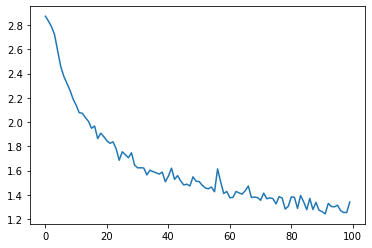

In [13]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
        
        
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)        
        

Evaluasi
======================

Untuk melihat performa network pada kategori yang berbeda, kita akan membuat sebuah confusion matrix, sebagai indikator untuk setiap input bahasa (baris), bahasa manakah yang ditebak (kolom). Untuk menghitung confusion matrix, sampel akan melewati network melalui fungsi ``evaluate()``, dimana identik dengan fungsi ``train()`` kecuali bagian backprop.




/var/folders/kd/_1v8y25532s15fst0bgq8gvh0000gn/T/ipykernel_26680/3585656379.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
/var/folders/kd/_1v8y25532s15fst0bgq8gvh0000gn/T/ipykernel_26680/3585656379.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


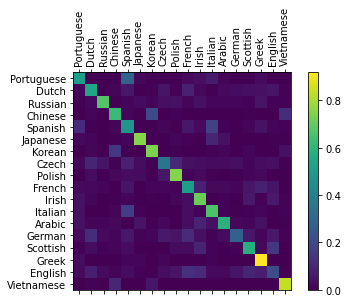

In [14]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

Prediksi pada Input Apapun
---------------------




In [15]:
def predict(input_line, n_predictions=5):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Sanga')
predict('Yozef')
predict('Hendrik')
predict('Bambang')



> Sanga
(-1.05) Spanish
(-2.11) Portuguese
(-2.13) Japanese
(-2.24) Czech
(-2.33) Polish

> Yozef
(-0.52) Polish
(-2.42) Czech
(-2.54) Dutch
(-2.86) Arabic
(-3.29) English

> Hendrik
(-0.84) Polish
(-1.73) Czech
(-2.23) Russian
(-2.44) Dutch
(-2.86) French

> Bambang
(-1.60) Italian
(-1.78) French
(-2.09) German
(-2.30) Spanish
(-2.41) English


### Tugas

Coba modifikasi struktur network, misalnya menambah beberapa lapisan linear
    




### 2 hidden layers

In [16]:
class RNN2L(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN2L, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = torch.nn.Linear(input_size + hidden_size, hidden_size)
        self.h2h = torch.nn.Linear(hidden_size, hidden_size)
        self.i2o = torch.nn.Linear(input_size + hidden_size, output_size)
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, input_data, hidden):
        combined = torch.cat((input_data, hidden), 1)
        hidden = self.i2h(combined)
        hidden = self.h2h(hidden)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
print(n_letters, n_hidden, n_categories)
rnn = RNN2L(n_letters, n_hidden, n_categories)
rnn

57 128 18


RNN2L(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (h2h): Linear(in_features=128, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

5000 5% (0m 5s) 2.9155 Ross / Greek ✗ (Scottish)
10000 10% (0m 10s) 2.2446 O'Mahony / Irish ✓
15000 15% (0m 15s) 1.7899 Cardona / Japanese ✗ (Spanish)
20000 20% (0m 20s) 1.4429 Noguerra / Spanish ✓
25000 25% (0m 25s) 2.2134 Kerrison / Russian ✗ (English)
30000 30% (0m 30s) 0.6265 Shin / Korean ✓
35000 35% (0m 35s) 0.2768 Ontikov / Russian ✓
40000 40% (0m 40s) 2.2645 Arechavaleta / Czech ✗ (Spanish)
45000 45% (0m 45s) 2.0724 Siekert / Dutch ✗ (German)
50000 50% (0m 50s) 0.4179 Sniegowski / Polish ✓
55000 55% (0m 55s) 1.5898 Phocas / Greek ✓
60000 60% (1m 0s) 2.9173 Aloia / Arabic ✗ (Italian)
65000 65% (1m 5s) 3.5338 Swain / Korean ✗ (English)
70000 70% (1m 10s) 2.1645 Velsh / Italian ✗ (Russian)
75000 75% (1m 16s) 0.6012 Turmilov / Russian ✓
80000 80% (1m 21s) 1.8477 Keefe / Dutch ✗ (English)
85000 85% (1m 26s) 0.6787 Iturburua / Spanish ✓
90000 90% (1m 31s) 3.5366 Munro / Spanish ✗ (Scottish)
95000 95% (1m 36s) 0.1709 Zhivotovsky / Russian ✓
100000 100% (1m 41s) 2.0924 Bonomo / Japanes

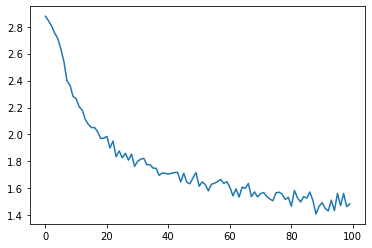

In [17]:
n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
        
        
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)        
        

/var/folders/kd/_1v8y25532s15fst0bgq8gvh0000gn/T/ipykernel_26680/3441438691.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
/var/folders/kd/_1v8y25532s15fst0bgq8gvh0000gn/T/ipykernel_26680/3441438691.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


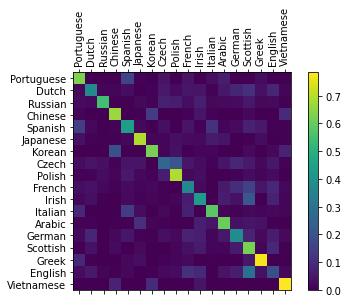


> Sanga
(-1.51) Spanish
(-1.80) Arabic
(-1.85) Czech
(-1.90) Portuguese
(-2.55) Polish

> Yozef
(-1.13) Arabic
(-1.31) Polish
(-2.35) Portuguese
(-2.35) Dutch
(-3.03) Czech

> Hendrik
(-0.87) Polish
(-1.30) Czech
(-2.98) Dutch
(-3.07) Spanish
(-3.29) Portuguese

> Bambang
(-1.56) English
(-2.04) German
(-2.19) Dutch
(-2.55) Polish
(-2.84) Irish


In [18]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

def predict(input_line, n_predictions=5):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Sanga')
predict('Yozef')
predict('Hendrik')
predict('Bambang')


### 3 hidden layers

In [19]:
class RNN3L(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN3L, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = torch.nn.Linear(input_size + hidden_size, hidden_size)
        self.h2h = torch.nn.Linear(hidden_size, hidden_size)
        self.h2hh = torch.nn.Linear(hidden_size, hidden_size)
        self.i2o = torch.nn.Linear(input_size + hidden_size, output_size)
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, input_data, hidden):
        combined = torch.cat((input_data, hidden), 1)
        hidden = self.i2h(combined)
        hidden = self.h2h(hidden)
        hidden = self.h2hh(hidden)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
print(n_letters, n_hidden, n_categories)
rnn = RNN3L(n_letters, n_hidden, n_categories)
rnn

57 128 18


RNN3L(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (h2h): Linear(in_features=128, out_features=128, bias=True)
  (h2hh): Linear(in_features=128, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

5000 5% (0m 6s) 2.7057 Ilett / French ✗ (English)
10000 10% (0m 13s) 2.6227 Vargas / Greek ✗ (Portuguese)
15000 15% (0m 19s) 3.4291 Bohm / Vietnamese ✗ (German)
20000 20% (0m 26s) 1.5277 Sai / Chinese ✗ (Vietnamese)
25000 25% (0m 32s) 1.9821 Kusak / Polish ✗ (Czech)
30000 30% (0m 39s) 1.0936 Zang / Chinese ✓
35000 35% (0m 46s) 2.1108 Elehin / Irish ✗ (Russian)
40000 40% (0m 52s) 1.4752 Minkovich / Russian ✓
45000 45% (0m 59s) 0.2877 Ichisada / Japanese ✓
50000 50% (1m 5s) 2.9908 Han / Chinese ✗ (Korean)
55000 55% (1m 12s) 1.5309 Sierra / Portuguese ✗ (Spanish)
60000 60% (1m 19s) 2.3089 Plank / Italian ✗ (German)
65000 65% (1m 25s) 0.5426 an / Vietnamese ✓
70000 70% (1m 32s) 1.6233 Ackary / English ✓
75000 75% (1m 38s) 7.7594 Tsoumada / Japanese ✗ (Greek)
80000 80% (1m 45s) 1.0603 Paitakes / Greek ✓
85000 85% (1m 51s) 1.1949 Faolan / Irish ✓
90000 90% (1m 58s) 0.7332 Yun / Chinese ✓
95000 95% (2m 5s) 1.3818 Nunes / Portuguese ✓
100000 100% (2m 11s) 0.3411 Millar / Scottish ✓


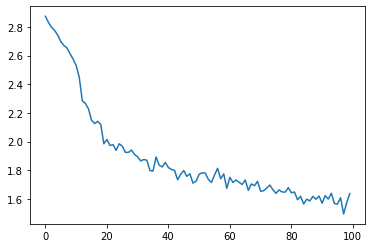

In [20]:
n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
        
        
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)        
        

/var/folders/kd/_1v8y25532s15fst0bgq8gvh0000gn/T/ipykernel_26680/3441438691.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
/var/folders/kd/_1v8y25532s15fst0bgq8gvh0000gn/T/ipykernel_26680/3441438691.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


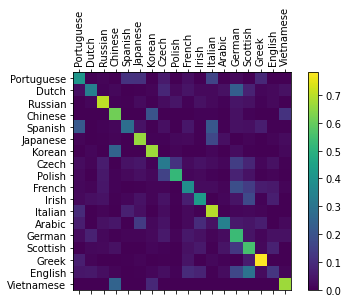


> Sanga
(-1.41) Czech
(-1.70) Japanese
(-1.82) Spanish
(-2.06) Arabic
(-2.25) Portuguese

> Yozef
(-1.24) Arabic
(-1.91) Czech
(-2.06) German
(-2.39) Polish
(-2.61) English

> Hendrik
(-1.00) Czech
(-1.52) Polish
(-2.73) Scottish
(-2.79) Russian
(-2.84) English

> Bambang
(-1.21) Vietnamese
(-2.10) German
(-2.24) French
(-2.25) Irish
(-2.73) Dutch


In [21]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

def predict(input_line, n_predictions=5):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Sanga')
predict('Yozef')
predict('Hendrik')
predict('Bambang')
